In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from datetime import timedelta
# import measures

In [2]:
%matplotlib inline

## Data Collection

In [3]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)

    return tickers

In [4]:
tickers = save_sp500_tickers()

In [5]:
tickers = list(map(lambda x: x.replace('\n', ''), tickers))

In [6]:
price_table = pd.read_csv('prices.csv', index_col=0)
price_table.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-31,54.158398,12.739085,NaN,6.99,19.636719,3.045087,19.508415,14.90,25.577316,7.280872,...,59.231983,15.456899,8.669735,27.330851,NaN,9.113444,44.246666,65.001007,47.138226,NaN
2004-01-02,53.101070,12.780089,NaN,7.00,19.338285,3.142075,19.518400,14.86,25.583614,7.311727,...,59.996933,15.650038,8.664631,27.245951,NaN,8.882961,43.586666,64.631683,46.262157,NaN
2004-01-05,54.113800,12.780089,NaN,6.91,19.890385,3.123681,19.867832,15.20,25.351082,7.458268,...,60.153389,15.837661,8.664631,28.123247,NaN,9.012777,43.666668,64.050018,46.162266,NaN
2004-01-06,53.948200,12.687147,NaN,6.99,19.659101,3.138731,19.887802,15.61,25.803566,7.504542,...,60.918354,15.600375,8.664631,27.946375,NaN,9.282997,43.766666,63.736057,46.800102,NaN
2004-01-07,53.018284,12.821095,NaN,7.16,19.211456,3.076859,19.694550,15.66,26.614231,7.751354,...,61.457306,15.738331,8.741216,27.670456,NaN,9.124045,44.500000,64.446991,46.477341,NaN


In [5]:
# start = datetime(2004, 1, 1)
start = price_table.index[-1]
end = datetime.today()

In [14]:
tickers = price_table.columns
price_table_latest = pd.DataFrame(columns=tickers)
price_table_latest

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS


In [15]:
for ticker in tickers:
    asset = yf.Ticker(ticker)
    asset_p = asset.history(start=start, end=end)['Close']
    price_table_latest[ticker] = asset_p

In [18]:
# price_table.drop(columns=['BRK.B', 'BF.B'], inplace=True)

In [20]:
# price_table.to_csv('prices.csv')

In [17]:
price_table = price_table.append(price_table_latest)

In [7]:
price_table.tail()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-21,200.880005,122.599998,110.800003,342.640015,290.720001,93.180000,512.340027,81.610001,199.869995,28.389999,...,235.740005,125.989998,71.320000,126.949997,109.480003,117.449997,491.369995,176.649994,53.650002,170.149994
2021-04-22,200.899994,123.500000,110.050003,343.399994,290.160004,93.699997,507.290009,79.059998,200.300003,28.320000,...,233.149994,124.379997,71.120003,123.080002,109.080002,117.820000,487.350006,177.380005,52.560001,169.070007
2021-04-23,202.199997,123.309998,111.379997,351.029999,291.739990,93.019997,515.840027,82.760002,199.750000,28.299999,...,232.889999,124.150002,71.080002,129.660004,110.480003,117.720001,497.410004,177.619995,54.270000,170.539993
2021-04-26,199.630005,122.580002,111.389999,348.200012,289.519989,94.239998,515.700012,85.410004,197.139999,28.209999,...,231.300003,125.000000,70.599998,133.960007,110.440002,115.680000,498.500000,175.720001,54.610001,169.800003
2021-04-27,194.449997,121.699997,111.440002,340.630005,290.250000,91.599998,517.320007,85.209999,197.279999,27.799999,...,236.250000,127.750000,70.000000,133.610001,111.360001,116.410004,501.750000,176.350006,55.150002,169.750000


In [8]:
sp500 = yf.Ticker('^GSPC')

In [9]:
start = price_table.index[0]
end = price_table.index[-1]
sp500_p = sp500.history(start=start, end=end)

In [10]:
sp500_p.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-30,1109.479980,1109.750000,1106.410034,1109.640015,1012600000,0,0
2003-12-31,1109.640015,1112.560059,1106.209961,1111.920044,1027500000,0,0
2004-01-02,1111.920044,1118.849976,1105.079956,1108.479980,1153200000,0,0
2004-01-05,1108.479980,1122.219971,1108.479980,1122.219971,1578200000,0,0
2004-01-06,1122.219971,1124.459961,1118.439941,1123.670044,1494500000,0,0


In [23]:
sp500_p_cummax = sp500_p['Close'].cummax()
sp500_p_cummin = sp500_p['Close'].cummin()

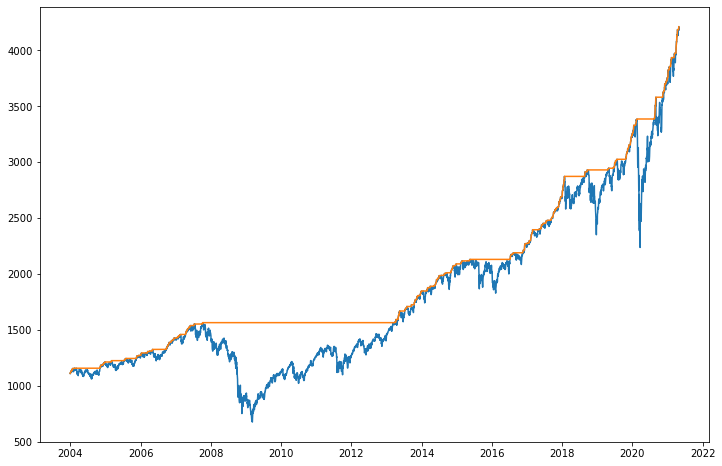

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(sp500_p['Close'])
plt.plot(sp500_p_cummax);

## Momentum and Reversal effect detection

#### Method 1

In [11]:
threshold_bear = .15
threshold_bull = .2

In [12]:
t0 = 0
period_max = sp500_p['Close'].iloc[t0]
period_min = sp500_p['Close'].iloc[t0]
bull = []
bear = []
indicator = True
for i in range(sp500_p.shape[0]):
    
    cur = sp500_p['Close'].iloc[i]
    
    if indicator:
        if cur > period_max:
            period_max = cur
            t_peak = i

        if (period_max - cur)/period_max > threshold_bear:
            bull.append((t0, t_peak))
            t0 = t_peak
    #         period_max = sp500_p.iloc[t_peak]
            period_min = cur
            indicator = False
    else:
        if cur < period_min:
            period_min = cur
            t_trough = i

        if (cur - period_min)/period_min > threshold_bull:
            bear.append((t0, t_trough))
            t0 = t_trough
            period_max = cur
    #         period_min = sp500_p.iloc[t_trough]
            indicator = True


In [13]:
sp500_p['class'] = 1

for x in bear:
    sp500_p.loc[sp500_p.index[x[0]:x[1]], 'class'] = 0

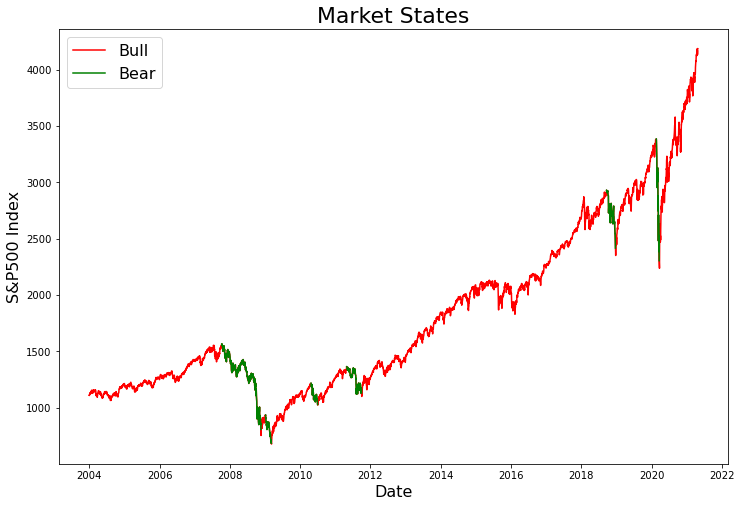

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(sp500_p['Close'], 'r')
for x in bear:
    plt.plot(sp500_p['Close'].iloc[x[0]:x[1]], 'g')
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('S&P500 Index', fontsize=16)
plt.title('Market States', fontsize=22)
plt.legend(['Bull', 'Bear'], fontsize=16)
plt.savefig('BullBear.png')

#### Method2

In [15]:
import ta

In [16]:
short_window = 25
sp500_p['SMA_{}'.format(short_window)] = ta.trend.SMAIndicator(close=sp500_p['Close'], window=short_window).sma_indicator()

In [17]:
sp500_p.dropna(inplace=True)

In [18]:
sp500_p['SMA_{}_DIFF'.format(short_window)] = sp500_p['SMA_{}'.format(short_window)].pct_change()

In [19]:
sp500_p['SMA_{}_DIFF'.format(short_window)].fillna(0, inplace=True)

In [20]:
sp500_p['class2'] = 0

for i in range(5, sp500_p.shape[0]):
    idx = sp500_p.index[i]
    
    ma_past = sp500_p['SMA_{}_DIFF'.format(short_window)][(i-4):(i+1)]
    close = sp500_p.loc[idx, 'Close']
    ma = sp500_p.loc[idx, 'SMA_{}'.format(short_window)]
    
    if close > ma and sum(ma_past >= 0) == 5:
        sp500_p.loc[idx, 'class2'] = 1
    elif close < ma and sum(ma_past >= 0) == 0:
        sp500_p.loc[idx, 'class2'] = -1
        

In [21]:
sp500_p.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,class,SMA_25,SMA_25_DIFF,class2
Date,,,,,,,,,,,
2021-04-20,4159.180176,4159.180176,4118.379883,4134.939941,4338230000,0,0,1,4032.727998,0.001649,1
2021-04-21,4128.419922,4175.020020,4126.350098,4173.419922,3865820000,0,0,1,4041.156396,0.002090,1
2021-04-22,4170.459961,4179.569824,4123.689941,4134.979980,4235040000,0,0,1,4047.590791,0.001592,1
2021-04-23,4138.779785,4194.169922,4138.779785,4180.169922,3568080000,0,0,1,4058.179189,0.002616,1
2021-04-26,4185.029785,4194.189941,4182.359863,4187.620117,3738920000,0,0,1,4069.159990,0.002706,1


In [22]:
from itertools import groupby

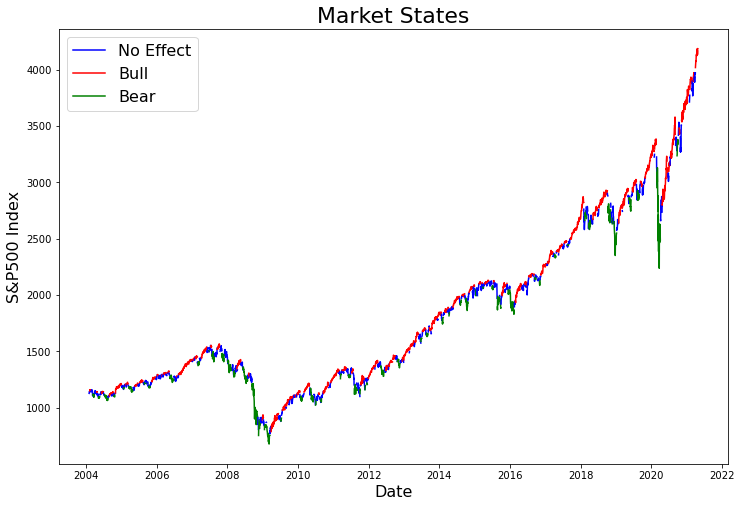

In [23]:
i = 0
c = {0: 'blue', 1: 'red', -1: 'green'}
l = []
labels = []
plt.figure(figsize=(12, 8))

for k, g in groupby(sp500_p['class2']):
    n = len(list(g))
    line, = plt.plot(sp500_p.iloc[i:i+n, 3], color=c[k])
    if k not in l:
        labels.append(line)
        l.append(k)
    i += n
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('S&P500 Index', fontsize=16)
plt.title('Market States', fontsize=22)
plt.legend(labels, ['No Effect', 'Bull', 'Bear'], fontsize=16)
plt.savefig('BullBear_v2.png');

### Feature Engineering

In [23]:
df = sp500_p.copy()

In [24]:
df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [25]:
short_window = 10
long_window = 20

#### Trend

In [26]:
df['SMA_{}'.format(short_window)] = ta.trend.SMAIndicator(close=df['Close'], window=short_window).sma_indicator()
df['SMA_{}'.format(long_window)] = ta.trend.SMAIndicator(close=df['Close'], window=long_window).sma_indicator()

In [27]:
df['EMA_{}'.format(short_window)] = ta.trend.EMAIndicator(close=df['Close'], window=short_window).ema_indicator()
df['EMA_{}'.format(long_window)] = ta.trend.EMAIndicator(close=df['Close'], window=long_window).ema_indicator()

In [28]:
df['MACD'] = ta.trend.MACD(close=df['Close']).macd()
df['MACD_DIFF'] = ta.trend.MACD(close=df['Close']).macd_diff()
df['MACD_SIGNAL'] = ta.trend.MACD(close=df['Close']).macd_signal()

In [29]:
df['KST'] = ta.trend.KSTIndicator(close=df['Close']).kst()
df['KST_DIFF'] = ta.trend.KSTIndicator(close=df['Close']).kst_diff()
df['KST_SIGNAL'] = ta.trend.KSTIndicator(close=df['Close']).kst_sig()

In [30]:
df['STC'] = ta.trend.STCIndicator(close=df['Close']).stc()
df['PSAR'] = ta.trend.PSARIndicator(high=df['High'], low=df['Low'], close=df['Close']).psar()
df['DPO_{}'.format(short_window)] = ta.trend.DPOIndicator(close=df['Close'], window=short_window).dpo()
df['DPO_{}'.format(long_window)] = ta.trend.DPOIndicator(close=df['Close'], window=long_window).dpo()

In [31]:
df['CCI_{}'.format(short_window)] = ta.trend.CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window = short_window).cci()
df['CCI_{}'.format(long_window)] = ta.trend.CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window = long_window).cci()

In [32]:
df['MassIndex'] = ta.trend.MassIndex(high=df['High'], low=df['Low']).mass_index()

In [33]:
df['TRIX_{}'.format(short_window)] = ta.trend.TRIXIndicator(close=df['Close'], window=short_window).trix()
df['TRIX_{}'.format(long_window)] = ta.trend.TRIXIndicator(close=df['Close'], window=long_window).trix()

In [34]:
df['VI_{}'.format(short_window)] = ta.trend.VortexIndicator(high=df['High'], low=df['Low'], close=df['Close'], window = short_window).vortex_indicator_diff()
df['VI_{}'.format(long_window)] = ta.trend.VortexIndicator(high=df['High'], low=df['Low'], close=df['Close'], window = long_window).vortex_indicator_diff()

In [35]:
df['ADX_{}'.format(short_window)]= ta.trend.ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window = short_window).adx()
df['ADX_{}'.format(long_window)]= ta.trend.ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window = long_window).adx()

D:\softwares\anaconda\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
D:\softwares\anaconda\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])
D:\softwares\anaconda\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
D:\softwares\anaconda\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


#### Volume

In [36]:
df['MFI_{}'.format(short_window)] = ta.volume.MFIIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window = short_window).money_flow_index()
df['MFI_{}'.format(long_window)] = ta.volume.MFIIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window = long_window).money_flow_index()

In [37]:
df['ADI'] = ta.volume.AccDistIndexIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume']).acc_dist_index()

In [38]:
df['OBV'] = ta.volume.OnBalanceVolumeIndicator(close=df['Close'], volume=df['Volume']).on_balance_volume()

In [39]:
df['CMF_{}'.format(short_window)] = ta.volume.ChaikinMoneyFlowIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=short_window).chaikin_money_flow()
df['CMF_{}'.format(long_window)] = ta.volume.ChaikinMoneyFlowIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=long_window).chaikin_money_flow()

In [40]:
df['FI_{}'.format(short_window)] = ta.volume.ForceIndexIndicator(close=df['Close'], volume=df['Volume'], window=short_window).force_index()
df['FI_{}'.format(long_window)] = ta.volume.ForceIndexIndicator(close=df['Close'], volume=df['Volume'], window=long_window).force_index()

In [41]:
df['EMV'] = ta.volume.EaseOfMovementIndicator(high=df['High'], low=df['Low'], volume=df['Volume'], window=short_window).ease_of_movement()
df['EMV_SMA'] = ta.volume.EaseOfMovementIndicator(high=df['High'], low=df['Low'], volume=df['Volume'], window=short_window).sma_ease_of_movement()

In [42]:
df['VPT'] = ta.volume.VolumePriceTrendIndicator(close=df['Close'], volume=df['Volume']).volume_price_trend()
df['NVI'] = ta.volume.NegativeVolumeIndexIndicator(close=df['Close'], volume=df['Volume']).negative_volume_index()

In [43]:
df['VWAP_{}'.format(short_window)] = ta.volume.VolumeWeightedAveragePrice(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=short_window).volume_weighted_average_price()
df['VWAP_{}'.format(long_window)] = ta.volume.VolumeWeightedAveragePrice(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=long_window).volume_weighted_average_price()

#### Volatility

In [44]:
df['ATR_{}'.format(short_window)] = ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=short_window).average_true_range()
df['ATR_{}'.format(long_window)] = ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=long_window).average_true_range()

In [45]:
df['BB_HIGH'] = ta.volatility.BollingerBands(close=df['Close']).bollinger_hband()
df['BB_LOW'] = ta.volatility.BollingerBands(close=df['Close']).bollinger_lband()
df['BB_EMA'] = ta.volatility.BollingerBands(close=df['Close']).bollinger_mavg()

In [46]:
df['KC_HIGH'] = ta.volatility.KeltnerChannel(high=df['High'], low=df['Low'], close=df['Close']).keltner_channel_hband()
df['KC_LOW'] = ta.volatility.KeltnerChannel(high=df['High'], low=df['Low'], close=df['Close']).keltner_channel_lband()
df['KC_EMA'] = ta.volatility.KeltnerChannel(high=df['High'], low=df['Low'], close=df['Close']).keltner_channel_mband()

In [47]:
df['DC_HIGH'] = ta.volatility.DonchianChannel(high=df['High'], low=df['Low'], close=df['Close']).donchian_channel_hband()
df['DC_LOW'] = ta.volatility.DonchianChannel(high=df['High'], low=df['Low'], close=df['Close']).donchian_channel_hband()
df['DC_EMA'] = ta.volatility.DonchianChannel(high=df['High'], low=df['Low'], close=df['Close']).donchian_channel_hband()

In [48]:
df['UI_{}'.format(short_window)] = ta.volatility.UlcerIndex(close=df['Close'], window=short_window).ulcer_index()
df['UI_{}'.format(long_window)] = ta.volatility.UlcerIndex(close=df['Close'], window=long_window).ulcer_index()

#### Momentum

In [49]:
df['RSI_{}'.format(short_window)] = ta.momentum.RSIIndicator(close=df['Close'], window=short_window).rsi()
df['RSI_{}'.format(long_window)] = ta.momentum.RSIIndicator(close=df['Close'], window=long_window).rsi()

In [50]:
df['SRSI'] = ta.momentum.StochRSIIndicator(close=df['Close']).stochrsi()

In [51]:
df['TSI'] = ta.momentum.TSIIndicator(close=df['Close']).tsi()

In [52]:
df['UO'] = ta.momentum.UltimateOscillator(high=df['High'], low=df['Low'], close=df['Close'], window1=5, window2=10, window3=20).ultimate_oscillator()

In [53]:
df['SR'] = ta.momentum.StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close'], window=short_window).stoch()

In [54]:
df['WR'] = ta.momentum.WilliamsRIndicator(high=df['High'], low=df['Low'], close=df['Close']).williams_r()

In [55]:
df['AO'] = ta.momentum.AwesomeOscillatorIndicator(high=df['High'], low=df['Low']).awesome_oscillator()

In [56]:
df['KAMA'] = ta.momentum.KAMAIndicator(close=df['Close']).kama()

In [57]:
df['ROC_{}'.format(short_window)] = ta.momentum.ROCIndicator(close=df['Close'], window=short_window).roc()
df['ROC_{}'.format(long_window)] = ta.momentum.ROCIndicator(close=df['Close'], window=long_window).roc()

In [58]:
df['PPO'] = ta.momentum.PercentagePriceOscillator(close=df['Close']).ppo()

In [59]:
df['PVO'] = ta.momentum.PercentageVolumeOscillator(volume=df['Volume']).pvo()

In [66]:
df.dropna(inplace=True)

In [61]:
# df.drop(columns=['class'], inplace=True)
df = pd.concat([df.iloc[:, 0:5], df.iloc[:, 9:]], axis=1)

In [67]:
df.to_csv('features.csv')
df.tail()

,Open,High,Low,Close,Volume,SMA_10,SMA_20,EMA_10,EMA_20,MACD,...,TSI,UO,SR,WR,AO,KAMA,ROC_10,ROC_20,PPO,PVO
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-26,4185.029785,4194.189941,4182.359863,4187.620117,3738920000,4159.652979,4105.234485,4151.182318,4106.395856,60.671775,...,33.465673,58.895984,91.333836,-5.219122,129.889681,4150.348101,1.444526,5.361125,1.486402,-6.545089
2021-04-27,4188.250000,4193.350098,4176.220215,4186.720215,3703240000,4164.166016,4116.015991,4157.643754,4114.045795,59.708339,...,33.258844,61.495073,90.146787,-6.690312,130.063054,4151.393691,1.089687,5.429998,1.460018,-6.607095
2021-04-28,4185.140137,4201.529785,4181.779785,4183.180176,3772390000,4170.018018,4127.247498,4162.286740,4120.630022,57.990678,...,32.886284,52.115081,77.931893,-17.307723,129.724212,4152.770814,1.418784,5.674556,1.415617,-6.449097
2021-04-29,4206.140137,4218.779785,4176.810059,4211.470215,4288940000,4174.123047,4139.176514,4171.229190,4129.281469,58.240824,...,33.416269,63.065647,92.719544,-7.031140,131.313400,4154.527466,0.984320,6.005209,1.418774,-5.212461
2021-04-30,4198.100098,4198.100098,4174.850098,4181.169922,4273680000,4173.693018,4147.241504,4173.036596,4134.223226,55.355978,...,32.055822,50.346333,62.539940,-37.460060,127.773004,4154.677997,-0.102743,4.012563,1.346647,-4.216956


In [36]:
df = pd.read_csv('features.csv', index_col=0)
df.tail()

,Open,High,Low,Close,Volume,SMA_10,SMA_20,EMA_10,EMA_20,MACD,...,TSI,UO,SR,WR,AO,KAMA,ROC_10,ROC_20,PPO,PVO
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-26,4185.029785,4194.189941,4182.359863,4187.620117,3738920000,4159.652979,4105.234485,4151.182318,4106.395856,60.671775,...,33.465673,58.895984,91.333836,-5.219122,129.889681,4150.348101,1.444526,5.361125,1.486402,-6.545089
2021-04-27,4188.250000,4193.350098,4176.220215,4186.720215,3703240000,4164.166016,4116.015991,4157.643754,4114.045795,59.708339,...,33.258844,61.495073,90.146787,-6.690312,130.063054,4151.393691,1.089687,5.429998,1.460018,-6.607095
2021-04-28,4185.140137,4201.529785,4181.779785,4183.180176,3772390000,4170.018018,4127.247498,4162.286740,4120.630022,57.990678,...,32.886284,52.115081,77.931893,-17.307723,129.724212,4152.770814,1.418784,5.674556,1.415617,-6.449097
2021-04-29,4206.140137,4218.779785,4176.810059,4211.470215,4288940000,4174.123047,4139.176514,4171.229190,4129.281469,58.240824,...,33.416269,63.065647,92.719544,-7.031140,131.313400,4154.527466,0.984320,6.005209,1.418774,-5.212461
2021-04-30,4198.100098,4198.100098,4174.850098,4181.169922,4273680000,4173.693018,4147.241504,4173.036596,4134.223226,55.355978,...,32.055822,50.346333,62.539940,-37.460060,127.773004,4154.677997,-0.102743,4.012563,1.346647,-4.216956


In [38]:
sp500_p

,Open,High,Low,Close,Volume,Dividends,Stock Splits,class,SMA_25,SMA_25_DIFF,class2
Date,,,,,,,,,,,
2004-02-04,1136.030029,1136.030029,1124.739990,1126.520020,1634800000,0,0,1,1130.788804,0.000000,0
2004-02-05,1126.520020,1131.170044,1124.439941,1128.589966,1566600000,0,0,1,1131.546802,0.000670,0
2004-02-06,1128.589966,1142.790039,1128.390015,1142.760010,1477600000,0,0,1,1132.780400,0.001090,0
2004-02-09,1142.760010,1144.459961,1139.209961,1139.810059,1303500000,0,0,1,1134.033604,0.001106,0
2004-02-10,1139.810059,1147.020020,1138.699951,1145.540039,1403900000,0,0,1,1134.966406,0.000823,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20,4159.180176,4159.180176,4118.379883,4134.939941,4338230000,0,0,1,4032.727998,0.001649,1
2021-04-21,4128.419922,4175.020020,4126.350098,4173.419922,3865820000,0,0,1,4041.156396,0.002090,1
2021-04-22,4170.459961,4179.569824,4123.689941,4134.979980,4235040000,0,0,1,4047.590791,0.001592,1


In [26]:
df.shape

(4268, 68)

In [27]:
import seaborn as sns; sns.set_theme()

In [28]:
corr = df.iloc[:, 6:].corr()

In [29]:
corr.shape

(62, 62)

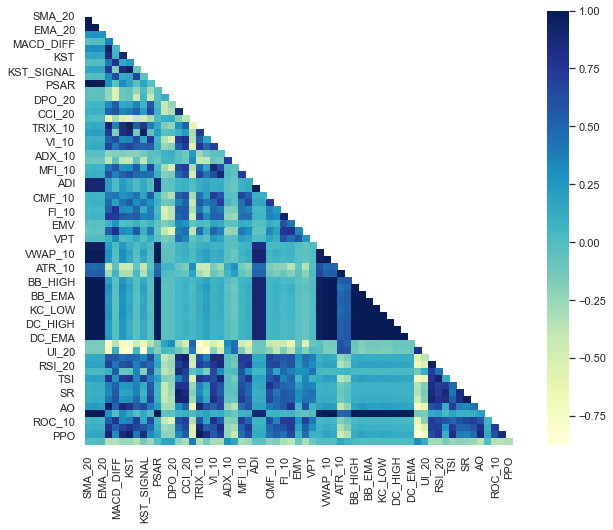

In [30]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap="YlGnBu")

    plt.savefig('Correlation.png')

## Feature Selection

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


start = '2005-01-01'

X = df[start:].dropna()
y = sp500_p.loc[start:, 'class2']
features = X.columns

In [32]:
from sklearn.svm import SVC

In [33]:
svm_model = SVC(probability=True)

In [69]:
X_train = X['2005':'2015-12-31']
X_test = X['2016-01-01':'2016-05-01']
y_train = y['2005':'2015-12-31']
y_test = y['2016-01-01':'2016-05-01']

In [50]:
svm_model = svm_model.fit(X_train, y_train)

In [51]:
from sklearn import metrics

predicted = pd.DataFrame(svm_model.predict(X_test))
probs = pd.DataFrame(svm_model.predict_proba(X_test))
labs = ['Bear', 'No Effect', 'Bull']
# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
# svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted, target_names=labs, zero_division=0)

In [52]:
svm_accuracy

0.4268292682926829

In [53]:
svm_confus_matrix

array([[ 0, 26,  3],
       [ 0,  1,  7],
       [ 0, 11, 34]], dtype=int64)

In [54]:
print(svm_classification_report)

              precision    recall  f1-score   support

        Bear       0.00      0.00      0.00        29
   No Effect       0.03      0.12      0.04         8
        Bull       0.77      0.76      0.76        45

    accuracy                           0.43        82
   macro avg       0.27      0.29      0.27        82
weighted avg       0.43      0.43      0.42        82



### Filter method

In [82]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=30)
# apply feature selection
X_train_selected = fs.fit_transform(X_train, y_train)
X_test_selected = fs.transform(X_test)

In [83]:
svm_model_filter = SVC(probability=True)
svm_model_filter = svm_model_filter.fit(X_train_selected, y_train)

In [84]:
predicted = pd.DataFrame(svm_model_filter.predict(X_test_selected))
probs = pd.DataFrame(svm_model_filter.predict_proba(X_test_selected))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
# svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted, target_names=labs)

In [85]:
svm_accuracy

0.8658536585365854

In [86]:
print(svm_classification_report)

              precision    recall  f1-score   support

        Bear       1.00      0.86      0.93        29
   No Effect       0.40      0.25      0.31         8
        Bull       0.85      0.98      0.91        45

    accuracy                           0.87        82
   macro avg       0.75      0.70      0.71        82
weighted avg       0.86      0.87      0.86        82



### Wrapper method

In [87]:
from boruta import BorutaPy

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rf = RandomForestClassifier(n_jobs=-1, max_depth=5)

In [159]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1)

In [188]:
predicted = pd.DataFrame(rf.predict(X_test))
probs = pd.DataFrame(rf.predict_proba(X_test))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
rf_classification_report = metrics.classification_report(y_test, predicted, target_names=labs)

In [189]:
rf_accuracy

0.9024390243902439

In [190]:
print(rf_classification_report)

              precision    recall  f1-score   support

        Bear       0.96      0.90      0.93        29
   No Effect       0.50      0.88      0.64         8
        Bull       1.00      0.91      0.95        45

    accuracy                           0.90        82
   macro avg       0.82      0.89      0.84        82
weighted avg       0.94      0.90      0.91        82



#### Forward Feature Selection

In [197]:
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, max_iter = 100)
boruta_feature_selector.fit(X_train.values, y_train.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	51
Tentative: 	17
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	51
Tentative: 	17
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	51
Tentative: 	17
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	51
Tentative: 	17
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	53
Tentative: 	15
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	53
Tentative: 	15
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	53
Tentative: 	15
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	53
Tentative: 	15
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	54
Tentative: 	14
Rejec

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=231,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x193BE512740),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x193BE512740, verbose=2)

In [143]:
X_train_wrapper = boruta_feature_selector.transform(X_train.values)
X_test_wrapper = boruta_feature_selector.transform(X_test.values)

In [144]:
features = X.columns
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)

['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_10', 'EMA_10', 'EMA_20', 'MACD', 'MACD_DIFF', 'MACD_SIGNAL', 'KST', 'KST_DIFF', 'KST_SIGNAL', 'STC', 'DPO_10', 'DPO_20', 'CCI_10', 'CCI_20', 'MassIndex', 'TRIX_10', 'TRIX_20', 'VI_10', 'VI_20', 'ADX_10', 'ADX_20', 'MFI_10', 'MFI_20', 'ADI', 'OBV', 'CMF_10', 'CMF_20', 'FI_10', 'FI_20', 'EMV', 'EMV_SMA', 'VPT', 'NVI', 'VWAP_10', 'ATR_10', 'ATR_20', 'BB_HIGH', 'BB_LOW', 'BB_EMA', 'KC_HIGH', 'KC_LOW', 'UI_10', 'UI_20', 'RSI_10', 'RSI_20', 'SRSI', 'TSI', 'UO', 'SR', 'WR', 'AO', 'KAMA', 'ROC_10', 'ROC_20', 'PPO', 'PVO']


In [145]:
len(final_features)

61

In [146]:
rf_wrapper = RandomForestClassifier(n_jobs=-1, max_depth=5)
rf_wrapper.fit(X_train_wrapper, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1)

In [191]:
predicted = pd.DataFrame(rf_wrapper.predict(X_test_wrapper))
probs = pd.DataFrame(rf_wrapper.predict_proba(X_test_wrapper))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
rf_classification_report = metrics.classification_report(y_test, predicted, target_names=labs)

In [192]:
rf_accuracy

0.9146341463414634

In [193]:
print(rf_classification_report)

              precision    recall  f1-score   support

        Bear       0.96      0.93      0.95        29
   No Effect       0.54      0.88      0.67         8
        Bull       1.00      0.91      0.95        45

    accuracy                           0.91        82
   macro avg       0.83      0.91      0.86        82
weighted avg       0.94      0.91      0.92        82



### Embedded Methods

In [164]:
importances = pd.DataFrame({'Features': features.values, 'Importance': rf.feature_importances_})

In [168]:
importances.sort_values('Importance', ascending=False, inplace=True)

In [169]:
importances['CumImportance'] = importances['Importance'].cumsum()

In [175]:
top = importances.loc[importances['CumImportance'] <= .955]

In [181]:
X_train_em = X_train.loc[:, features[top.index]]
X_test_em = X_test.loc[:, features[top.index]]

In [182]:
rf_em = RandomForestClassifier(n_jobs=-1, max_depth=5)
rf_em.fit(X_train_em, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1)

In [194]:
predicted = pd.DataFrame(rf_em.predict(X_test_em))
probs = pd.DataFrame(rf_em.predict_proba(X_test_em))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
rf_classification_report = metrics.classification_report(y_test, predicted, target_names=labs)

In [195]:
rf_accuracy

0.9024390243902439

In [196]:
print(rf_classification_report)

              precision    recall  f1-score   support

        Bear       0.96      0.93      0.95        29
   No Effect       0.50      0.88      0.64         8
        Bull       1.00      0.89      0.94        45

    accuracy                           0.90        82
   macro avg       0.82      0.90      0.84        82
weighted avg       0.94      0.90      0.91        82



In [199]:
svm_model_em = SVC(probability=True)
svm_model_em = svm_model_filter.fit(X_train_em, y_train)

In [201]:
predicted = pd.DataFrame(svm_model_em.predict(X_test_em))
probs = pd.DataFrame(svm_model_em.predict_proba(X_test_em))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted, target_names=labs)

In [202]:
svm_accuracy

0.9390243902439024

In [203]:
print(svm_classification_report)

              precision    recall  f1-score   support

        Bear       0.96      0.93      0.95        29
   No Effect       0.64      0.88      0.74         8
        Bull       1.00      0.96      0.98        45

    accuracy                           0.94        82
   macro avg       0.87      0.92      0.89        82
weighted avg       0.95      0.94      0.94        82



### PCA

In [57]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(X_train)

In [71]:
principalComponents.shape

(2769, 30)

In [72]:
principalComponents_test = pca.transform(X_test)

In [73]:
svm_model_pca = SVC(probability=True)
svm_model_pca = svm_model_pca.fit(principalComponents, y_train)

In [74]:
predicted = pd.DataFrame(svm_model_pca.predict(principalComponents_test))
probs = pd.DataFrame(svm_model_pca.predict_proba(principalComponents_test))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
# svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted, target_names=labs, zero_division=0)

In [75]:
svm_accuracy

0.14634146341463414

In [76]:
print(svm_classification_report)

              precision    recall  f1-score   support

        Bear       0.00      0.00      0.00        29
   No Effect       0.10      1.00      0.19         8
        Bull       1.00      0.09      0.16        45

    accuracy                           0.15        82
   macro avg       0.37      0.36      0.12        82
weighted avg       0.56      0.15      0.11        82



### Standardization

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
svm_model_scale = SVC(probability=True)
svm_model_scale = svm_model_scale.fit(X_train_scaled, y_train)

In [78]:
predicted = pd.DataFrame(svm_model_scale.predict(X_test_scaled))
probs = pd.DataFrame(svm_model_scale.predict_proba(X_test_scaled))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
# svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted, target_names=labs, zero_division=0)

In [79]:
svm_accuracy

0.8902439024390244

In [80]:
print(svm_classification_report)

              precision    recall  f1-score   support

        Bear       1.00      0.83      0.91        29
   No Effect       0.47      1.00      0.64         8
        Bull       1.00      0.91      0.95        45

    accuracy                           0.89        82
   macro avg       0.82      0.91      0.83        82
weighted avg       0.95      0.89      0.91        82



In [81]:
price_table

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-31,54.158398,12.739085,NaN,6.990000,19.636719,3.045087,19.508415,14.900000,25.577316,7.280872,...,59.231983,15.456899,8.669735,27.330851,NaN,9.113444,44.246666,65.001007,47.138226,NaN
2004-01-02,53.101070,12.780089,NaN,7.000000,19.338285,3.142075,19.518400,14.860000,25.583614,7.311727,...,59.996933,15.650038,8.664631,27.245951,NaN,8.882961,43.586666,64.631683,46.262157,NaN
2004-01-05,54.113800,12.780089,NaN,6.910000,19.890385,3.123681,19.867832,15.200000,25.351082,7.458268,...,60.153389,15.837661,8.664631,28.123247,NaN,9.012777,43.666668,64.050018,46.162266,NaN
2004-01-06,53.948200,12.687147,NaN,6.990000,19.659101,3.138731,19.887802,15.610000,25.803566,7.504542,...,60.918354,15.600375,8.664631,27.946375,NaN,9.282997,43.766666,63.736057,46.800102,NaN
2004-01-07,53.018284,12.821095,NaN,7.160000,19.211456,3.076859,19.694550,15.660000,26.614231,7.751354,...,61.457306,15.738331,8.741216,27.670456,NaN,9.124045,44.500000,64.446991,46.477341,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,200.880005,122.599998,110.800003,342.640015,290.720001,93.180000,512.340027,81.610001,199.869995,28.389999,...,235.740005,125.989998,71.320000,126.949997,109.480003,117.449997,491.369995,176.649994,53.650002,170.149994
2021-04-22,200.899994,123.500000,110.050003,343.399994,290.160004,93.699997,507.290009,79.059998,200.300003,28.320000,...,233.149994,124.379997,71.120003,123.080002,109.080002,117.820000,487.350006,177.380005,52.560001,169.070007
2021-04-23,202.199997,123.309998,111.379997,351.029999,291.739990,93.019997,515.840027,82.760002,199.750000,28.299999,...,232.889999,124.150002,71.080002,129.660004,110.480003,117.720001,497.410004,177.619995,54.270000,170.539993
